# Feature Engineering
Feature engineering is the process of using domain knowlwdge to extract features from raw data. These features can be used to improve the perforamnce of machine learning.

মেশিন লার্নিং এর মডেল Deploy  করার আগে  Domain knowledge  অনুযায়ী  Data কে  preprocessing  যেমন  null value  বাদ দেয়া,  Feature (column) , unnecessary column  বাদ দেয়া বা প্রয়োজন অনুযায়ী নতুন  colum  তৈরি করা এবং তারপরে  machine learing model deploy  করার  full process এয়  feature engineering.

## Feature Engineering 
* Feature transformation:
transform input columns.
* Feature construction: 
if need create new features manually fro better result.
* Feature Selection:
unnecessary features need to remove.
* Feature Extraction:
from given fetures create new features in a programmable way not manually. use it for high dimentional data. 

### 1. Feature Transformation steps: transform input columns in different columns.
* Missing value imputation: Before train data need to remove or fill null values using mean median and mode.
* Handaling categorical Features: convert categorical value into numerial value because machine learing best output need to numerical value. that's mans transform into different from using one hot encoding.
* Outlier Detection: remove outlier for best fit model.
* Feature scaling: numerical input data scle or range given or create for continus data.

### What is feature scaling?
Feature scaling is a technique to standardize the independent features presnt in the data in a fixed range. মানে ছোট  range  এ নিয়ে আসা। <br>
#### Types of scaling:
* Standardization also called z-score Normalization
* Normalization: 1, minimize scaler. 2, Robus scalar

#### Formula of standardization:
xi = xi - mean(x)/standarddeviation <br>
mean = 0 and sd = 1 . always

## Code example and impact of Outliers

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# remove unnessary features. just keep those are need.

In [6]:
df.iloc[:,2:]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
63,15583681,Male,32,120000,1


In [8]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
# every time must do it: train test split


In [10]:
from sklearn.model_selection import  train_test_split

In [28]:
X_tain,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [12]:
X_tain.shape

(280, 2)

In [13]:
X_test.shape

(120, 2)

In [29]:
df.drop('Purchased',axis=1)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [14]:
# Standardize Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
# Create an object
scalar = StandardScaler()
scalar

StandardScaler()

In [16]:
# Fit and transform 
scalar.fit(X_tain)
X_tain_scaled = scalar.transform(X_tain)
X_test_scaled = scalar.transform(X_test)

In [17]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [23]:
# যেহেতু output scaled Data numpy array হিসেবে show করছে so  আমার এই ডাটাকে Dataframe  এ convert করে  then show  করব
X_train_scaled = pd.DataFrame(X_tain_scaled, columns = X_tain.columns)
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [24]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804


In [25]:
# আমাদের শর্ত ছিল mean = 0 এবং Sd=1  করা। 
np.round(X_tain.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [26]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [38]:
# np.round show better view
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


# Effect of scaling Before scaling and after scaling scatterplot draw 

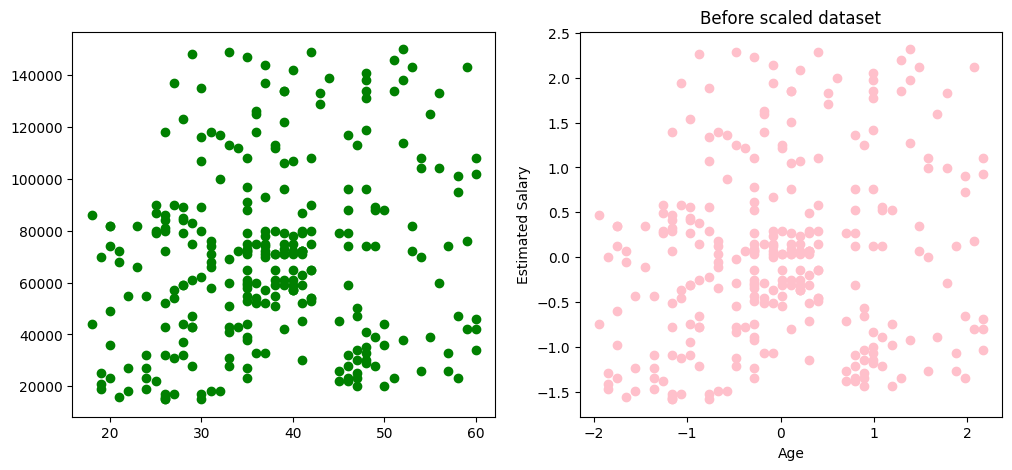

In [37]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_tain['Age'],X_tain['EstimatedSalary'], color='green')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Before scaled dataset')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'], color='pink')

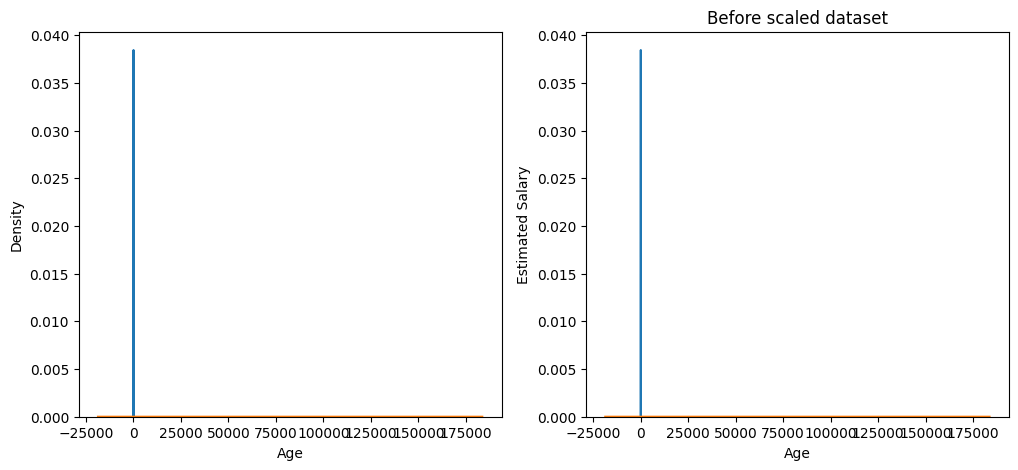

In [42]:
# using kde plot to show comparison
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
# before
sns.kdeplot(X_tain['Age'], ax=ax1)
sns.kdeplot(X_tain['EstimatedSalary'], ax=ax1)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Before scaled dataset')
# after
sns.kdeplot(X_tain['Age'], ax=ax2)
sns.kdeplot(X_tain['EstimatedSalary'], ax=ax2)
plt.show()